# Lab - Filtragem por blocos

Esta atividade propõe a realização da filtragem por blocos. 
Primeiramente a EDCC é aplicada com e sem as condições inicias (do bloco anterior) para se verificar a diferença.
Depois é verificado o efeito da convolução circular devido ao produto no domínio da frequência e os métodos *overlap-add* e *overlap-save*.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy.signal import lfilter, freqz, firwin

1) Considere para n=0...63, o sinal $x[n]$, a soma de três senoides.

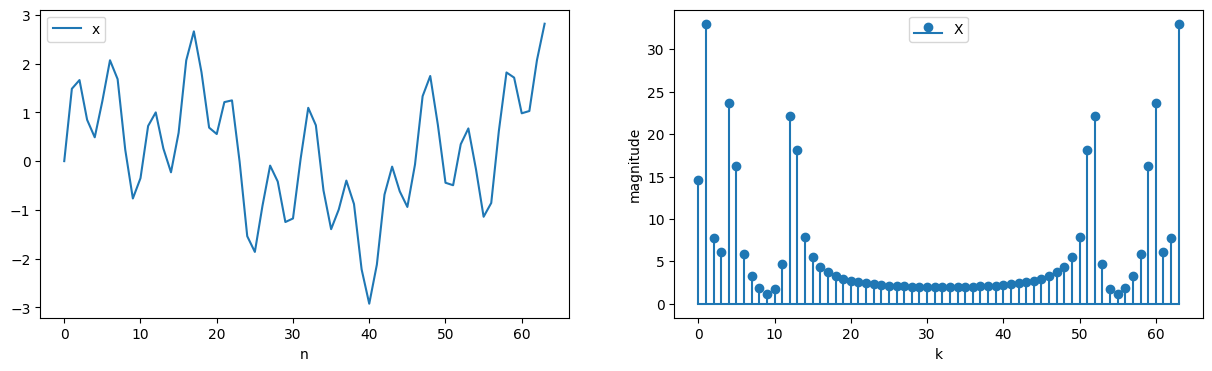

In [2]:
N=64
n=arange(N)
x0=sin(1.3*pi*n/32)
x1=sin(4.4*pi*n/32)
x2=sin(12.4*pi*n/32)
x=x0+x1+x2

figure(figsize=(15,4))
subplot(1,2,1)
plot(x,label='x')
legend()
xlabel('n')
subplot(1,2,2)
stem(abs(fft(x)),basefmt='C0', label='X')
legend()
xlabel('k')
ylabel('magnitude')
show()

2) Obtenha os coeficientes de um filtro fir de ordem 15 com frequência normalizada de corte igual a 0,25 ($w=\pi/4$). Visualize a resposta ao impulso deste filtro. Em outro gráfico, visualize a resposta em frequência do filtro e a DFT do sinal $x[n]$ no mesmo eixo, para frequências de 0 a $\pi$.

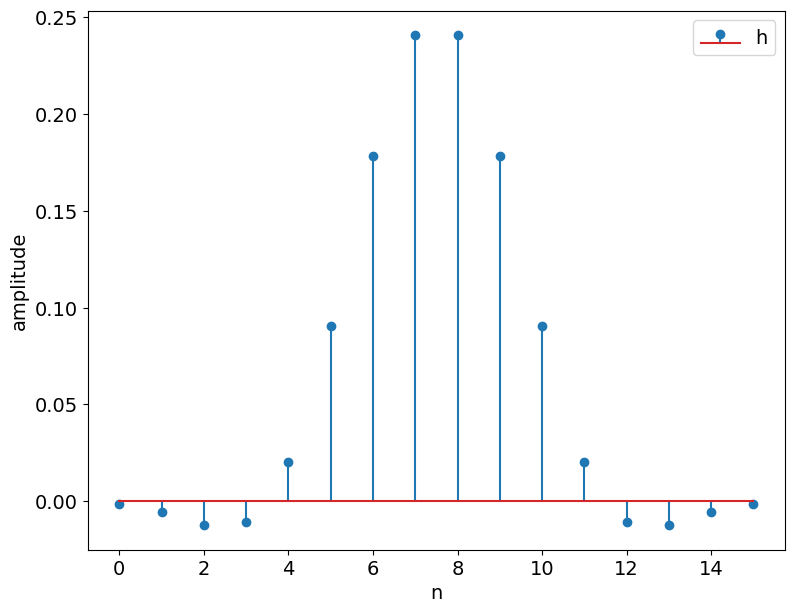

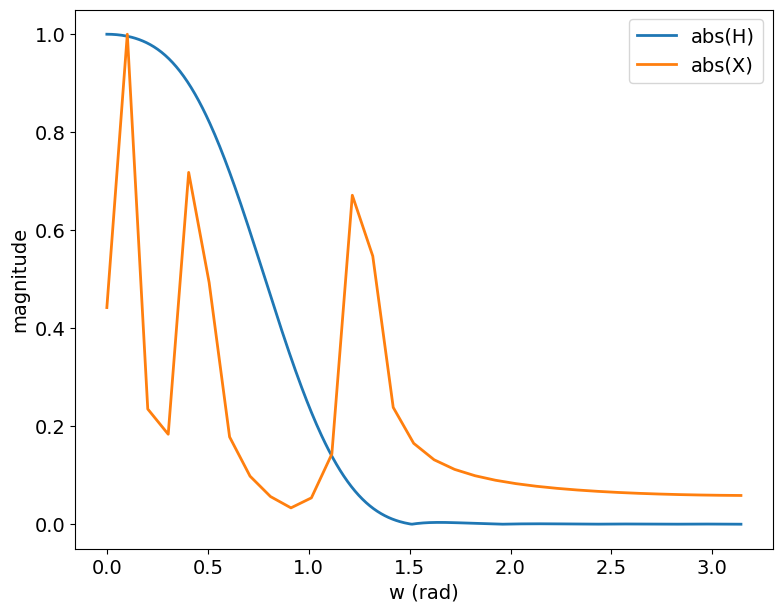

In [3]:
ordem = 15
Wn = 0.25
h = firwin(numtaps = ordem+1, cutoff = Wn)

w, H = freqz(h)
X = fft(x)

rcParams.update({'font.size':14})
figure(figsize=(9,7))
stem(h, label = 'h')
xlabel('n')
ylabel('amplitude')
legend()
show()

figure(figsize=(9,7))
plot(linspace(0, pi, num=len(H)), abs(H), linewidth = 2, label = 'abs(H)')
plot(linspace(0, pi, num=len(X)//2), abs(X)[:len(fft(x))//2]/max(abs(X)), linewidth = 2, label = 'abs(X)')
xlabel('w (rad)')
ylabel('magnitude')
legend()
show()

3) Filtre o sinal $x[n]$ aplicando a equação recursiva de diferenças com os coeficientes do filtro (função lfilter()) obtendo $y[n]$ com 64 pontos. Depois repita esta operação nas duas metades do sinal x (n=0:32 e n=32:64), sem especificar as condições iniciais. O valor padrão considera as condições iniciais em repouso, portanto nulas. Em seguida, repita a operação nos dois blocos, mas considerando as condições iniciais como as condições finais do bloco anterior. Considerar as condições iniciais do primeiro bloco como zero. Plotar no mesmo gráfico o sinal filtrado y; as duas metades filtradas ya, yb; as duas metades filtras com condições iniciais especificadas ya0, yb0.

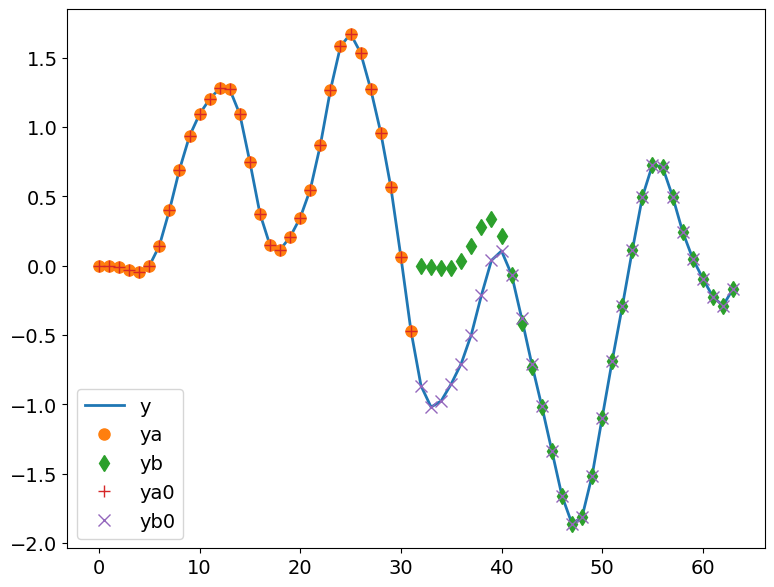

In [4]:
y = lfilter(h, 1, x)
ya = lfilter(h, 1, x[0:32])
yb = lfilter(h, 1, x[32:64])
ya0, zf1 = lfilter(h, 1, x[0:32], zi = zeros(len(h) - 1))
yb0, zf2 = lfilter(h, 1, x[32:64], zi = zf1)

rcParams.update({'font.size':14})
figure(figsize=(9,7))
plot(y, linewidth = 2, label = 'y')
plot(ya, 'o', markersize = 8, label = 'ya')
plot(arange(32, 64), yb, 'd', markersize = 8, label = 'yb')
plot(ya0, '+', markersize = 8, label = 'ya0')
plot(arange(32, 64), yb0, 'x', markersize = 8, label = 'yb0')
legend()
show()

4) Filtre o sinal $x[n]$, por blocos de 32 amostras, fazendo produto no domínio da frequência com a resposta em frequência do filtro $Y[k]=X[k] H[k]$ e obtendo $y2[n]=\text{ifft}(Y[k])$ para cada bloco (a, b). Esta abordagem equivale a convolução circular que não é exatamente igual à convolução. Plot o resultado de cada bloco juntamente com o sinal corretamente filtrado $y[n]$.


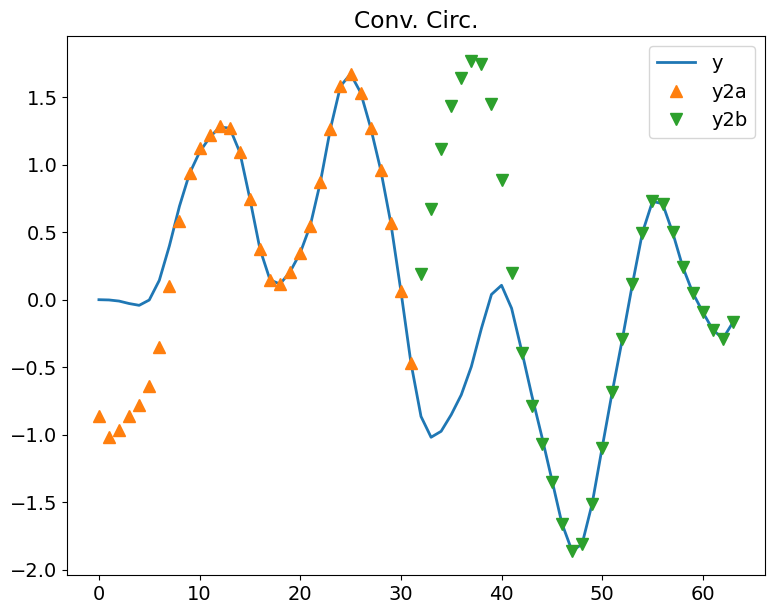

In [5]:
xa = x[0:32]
xb = x[32:64]
Xa = fft(xa)
Xb = fft(xb)
#w, H = freqz(h,1,32)
H2 = fft(h,32)
Ya = Xa*H2
Yb = Xb*H2
y2a = ifft(Ya)
y2b = ifft(Yb)

rcParams.update({'font.size':14})
figure(figsize=(9,7))
plot(y, linewidth = 2, label = 'y')
plot(y2a.real, '^', markersize = 8, label = 'y2a')
plot(arange(32, 64), y2b.real, 'v', markersize = 8, label = 'y2b')
title('Conv. Circ.')
legend()
show()

5) filtre o sinal $x[n]$, por blocos de 32 amostras, mas completando cada bloco com mais 32 zeros, fazendo produto no domínio da frequência com a resposta em frequência do filtro $Y[k]=X[k] H[k]$ e obtendo $y3[n]=\text{ifft}(Y[k])$ com 64 valores. Sobreponha e some as duas respostas para obter $y3[n]$ pelo método *overlap-add*. Plot o resultado de cada bloco (y3a e y3b), juntamente com a soma (y3) o sinal corretamente filtrado y.


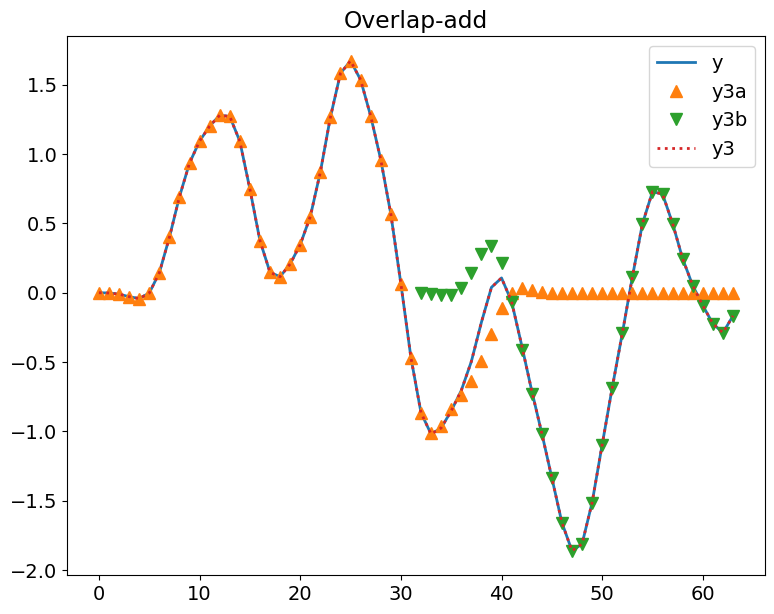

In [6]:
x3a = concatenate((x[0:32], zeros(32)))
x3b = concatenate((zeros(32), x[32:64]))
X3a = fft(x3a)
X3b = fft(x3b)
H3 = fft(h,64)
Y3a = X3a*H3
Y3b = X3b*H3
y3a = ifft(Y3a)
y3b = ifft(Y3b)
y3 = concatenate((y3a[0:32], y3a[32:64] + y3b[32:64]))

rcParams.update({'font.size':14})
figure(figsize=(9,7))
plot(y, linewidth = 2, label = 'y')
plot(y3a.real,'^', markersize = 8, label = 'y3a')
plot(arange(32,64), y3b[32:64].real, 'v', markersize = 8, label = 'y3b')
plot(y3.real, ':', linewidth = 2, label = 'y3')
title('Overlap-add')
legend()
show()

6) Filtre o sinal $x[n]$, por blocos de 32 amostras, sem completar cada bloco com mais 32 zeros, fazendo produto no domínio da frequência com a resposta em frequência do filtro $Y[k]=X[k] H[k]$ e obtendo $y4[n]=ifft(Y[k])$ com 32 amostras. Considere 3 blocos de 32 amostras com sobreposição de 16 amostras (n=0:32; n=16:48; n=32:64), para descartar as primeiras 16 amostras e resultar no segmento da convolução circular que é identico à convolução. Sobreponha as três respostas para obter $y4[n]$ pelo método *overlap-save*. Plote o resultado de cada bloco (y4a, y4b e y4c), juntamente com a sobreposição (y4) e o sinal corretamente filtrado y.


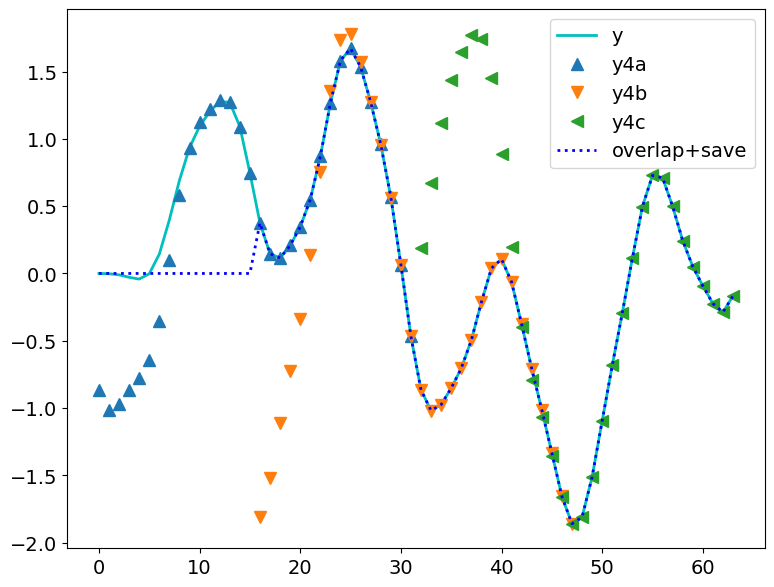

In [7]:
x4a = x[0:32]
x4b = x[16:48]
x4c = x[32:64]
X4a = fft(x4a)
X4b = fft(x4b)
X4c = fft(x4c)
H4 = fft(h,32)
Y4a = X4a*H4
Y4b = X4b*H4
Y4c = X4c*H4
y4a = ifft(Y4a)
y4b = ifft(Y4b)
y4c = ifft(Y4c)
y4 = concatenate((zeros(16), y4a[16:32], y4b[16:32], y4c[16:32]))

rcParams.update({'font.size':14})
figure(figsize=(9,7))
plot(y, 'c', linewidth = 2, label = 'y')
plot(y4a.real, '^', markersize = 8, label = 'y4a')
plot(arange(16, 48), y4b.real, 'v', markersize = 8, label = 'y4b')
plot(arange(32, 64), y4c.real, '<', markersize = 8, label = 'y4c')
plot(y4.real, ':b', linewidth = 2, label = 'overlap+save')
legend()
show()